JEUX DE DONNEE DE EXPRESSO


---

DESCRIPTION : Expresso est une société africaine de services de télécommunications qui fournit des services de télécommunications sur deux marchés africains : la Mauritanie et le Sénégal. Les données décrivent 2,5 millions de clients Expresso avec plus de 15 variables comportementales afin de prédire la probabilité de désabonnement des clients.

OBJECTIF : Prédire la probabilité de désabonnement des clients.

TRAVAIL A FAIRE :

1. Installer les packages nécessaires
2. Importez vos données et effectuez la phase d'exploration de base des données
Afficher des informations générales sur l'ensemble de données

  - Créez des rapports de profilage de pandas pour obtenir des informations sur l'ensemble de données
  - Gérer les valeurs manquantes et corrompues
  - Supprimer les doublons, s'ils existent
  - Gérer les valeurs aberrantes, si elles existent
  - Encoder les caractéristiques catégorielles
3. Sur la base de l'exploration des données précédentes, former et tester un classificateur d'apprentissage automatique
4. Créer une application simplifiée (localement)
Ajoutez des champs de saisie pour vos fonctionnalités et un bouton de validation à la fin du formulaire
5. Importez votre modèle ML dans l'application Streamlit et commencez à faire des prédictions en fonction des valeurs de fonctionnalités fournies

# 1. IMPORTATION DES LIBRAIRIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import warnings #IGNORER LES ALERTES
warnings.filterwarnings("ignore")

In [13]:
# !pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/33/85/45027914eb485482976883dcaab434eab99f1ed5cb222781e7ba46bdf3b7/ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/d3/07/bbfddb7b532b727a5769a8468a67ab388e74c029d4940e5de6b25231aba2/pydantic-2.8.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/123.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/123.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/123.5 kB ? eta -:--:--
     --------- --------------------------- 30.7/123.5 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/123.5 kB 393.8 kB/s eta 0:00:01
     ------------------------ ------------ 81.9/123.5 kB 573.4 kB/s eta 0:00:01
     ------------------------------------ 123.5/123.5 kB 658.8 kB/s eta 0:00:00
  Obtaining dependency information fo

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.8.0 which is incompatible.


In [4]:
# importation du jeu de données
paths='E:/exerces G-6/AED/exos_ML_deployements/Expresso_churn_app/datasets_db/'

data= pd.read_csv(paths+"Expresso_churn_dataset.csv")

In [6]:
data.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0


# 2 : Analyse exploratoire des données

In [7]:
#AFFICHAGE DES INFORMATIONS GENERALES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


   La base de donnée expresso est constituée 2154048 lignes reparties dans 19 colonnes dont 12 sont de types float,2 de type integer et 5 de types d'object

In [8]:
#ANALYSE DESCRIPTIVE
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [9]:
#  Rapport de profilage

profil = ProfileReport(data,title='RAPORT DE PROFIL EXPRESSO')
profil

### 2-1: Gestion des valeurs manquantes
### A: Identification

In [10]:
# gestion des valeurs manquantes
dat_effect = data.isna().sum()
eff_total = data.shape[0]
dat_percent = (dat_effect/eff_total)*100

pd.concat([dat_effect,round(dat_percent,2)],axis=1,keys=['EFFECTIF','POURCENTAGE'])

,EFFECTIF,POURCENTAGE
user_id,0,0.00
REGION,849299,39.43
TENURE,0,0.00
MONTANT,756739,35.13
FREQUENCE_RECH,756739,35.13
REVENUE,726048,33.71
ARPU_SEGMENT,726048,33.71
FREQUENCE,726048,33.71
DATA_VOLUME,1060433,49.23
ON_NET,786675,36.52


Dans ce jeux de donnée, la majorité des variables présentent un fort taux de valeurs manquantes.
Nous allons donc procéder à une imputation pour éviter de perdre beaucoup d'information 

In [11]:
#VARIABLES AYANT DES VALEURS MANQUANTES DE MOINS DE 50%
dat_percent[dat_percent<50]

user_id            0.000000
REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64

In [12]:
#SELECTION DES VARIABLES AYANT UN POURCENTAGE DE VALEURS MANQUANTES INFERIEUR A 50
val_select =dat_percent[dat_percent<50].index.tolist()


#CREATION D'UN NOUVEAU DATAFRAME CONTENANT LES VARIABLES SELECTIONNEES
new_data = data[val_select]
new_data.head(3)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,NO,17,On-net 1000F=10MilF;10d,1.0,0


In [13]:
# selection de toutes les  variables ayant des valeurs manquantes
data_nan=new_data.isna().sum()[new_data.isna().sum()>0].index.tolist()
data_nan

['REGION',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TOP_PACK',
 'FREQ_TOP_PACK']

#### selection des variables ayant des valeurs manquantes


In [14]:

#-------------VARIABLES CATEGORIELLE------------------
cols_cat_nan = new_data[data_nan].select_dtypes(include='object').columns.tolist()

data_cat_nan = new_data[cols_cat_nan]
data_cat_nan

,REGION,TOP_PACK
0,FATICK,On net 200F=Unlimited _call24H
1,NaN,NaN
2,NaN,On-net 1000F=10MilF;10d
3,DAKAR,"Data:1000F=5GB,7d"
4,DAKAR,Mixt 250F=Unlimited_call24H
...,...,...
2154043,NaN,NaN
2154044,THIES,"Data: 200 F=100MB,24H"
2154045,NaN,NaN
2154046,THIES,All-net 500F=2000F;5d


In [15]:
#-----------VARIABLES NUMERIQUES-------------------
cols_num_nan = new_data[data_nan].select_dtypes(include='number').columns.tolist()
data_num_nan = new_data[cols_num_nan]
data_num_nan

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,FREQ_TOP_PACK
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,8.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,1.0
3,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,11.0
4,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,2.0
...,...,...,...,...,...,...,...,...,...
2154043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2154044,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,9.0
2154045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2154046,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,12.0


### B : Correction des valeurs manques:
  Comme nous l'avons constaté , apparement il y'a beaucoup de valeurs manquante, si nous les suprimons on risque de perdre trop d'information donc allons les proceder à une inputation selon le type de donnée :

#### Pour les  Variable catégorielle
Nous allons procéder à une imputation en utilisant les methode ***bfill** et ***ffill** afin d'avoir une distribution plus ou moins repartie

#### Pour les Variable Numérique
Nous allons procéder à une imputation par la médiane, parceque d'après l'analyse visuelle fournit par le rapport de profillage, il sembles que les données poccede trop de valeurs aberrantes. Et dans ce cas on prefere la mediane que la moyenne car la moyenne peut être influencée par les valeurs aberrantes

In [16]:

##IMPUTATION DES VARAIABLES NUMERIQUES PAR LA MEDIANE
for col in cols_num_nan:
    new_data[col]= new_data[col].fillna(new_data[col].median())

In [17]:

#IMPUTATION DES VARAIABLES CATEGORIELLES PAR La "bfill" et "ffill"

for col in cols_cat_nan:
    new_data[col].fillna(method='ffill',inplace=True)
    new_data[col].fillna(method='bfill',inplace=True)

### D: Verification

In [18]:
new_data.isna().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [19]:
# resumer statistiques du nouvelle dataframe: numerique
new_data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN
count,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06,2.154048e+06
mean,4.642559e+03,9.937994e+00,4.664511e+03,1.554841e+03,1.230020e+01,1.835675e+03,1.861355e+02,6.781430e+01,2.804251e+01,7.482205e+00,1.875474e-01
std,5.853728e+03,1.090754e+01,5.970967e+03,1.990320e+03,1.219326e+01,9.606472e+03,7.057040e+02,1.600853e+02,2.228686e+01,9.594821e+00,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+03,4.000000e+00,1.901000e+03,6.340000e+02,6.000000e+00,2.310000e+02,1.200000e+01,2.000000e+01,6.000000e+00,4.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,2.400000e+01,5.000000e+00,0.000000e+00
75%,4.600000e+03,1.000000e+01,4.700000e+03,1.567000e+03,1.300000e+01,2.890000e+02,5.500000e+01,4.100000e+01,5.100000e+01,6.000000e+00,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,6.200000e+01,7.130000e+02,1.000000e+00


In [20]:
# resumer statistiques du nouvelle dataframe: categorielle
new_data.describe(include="O")

,user_id,REGION,TENURE,MRG,TOP_PACK
count,2154048,2154048,2154048,2154048,2154048
unique,2154048,14,8,1,140
top,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,848496,2043201,2154048,547462


In [21]:
#GESTION DES DOUBLONS

new_data.duplicated().value_counts()

False    2154048
Name: count, dtype: int64

Il n'y a pas de doublons

# 2-2 Analyse univariées 

In [22]:
# selection des collonnes selon le types
col_num= new_data.select_dtypes(include='number').columns.tolist()
col_cat = new_data.drop('user_id',axis=1).select_dtypes(include='object').columns.tolist()


### A: Distribution des variables numériques

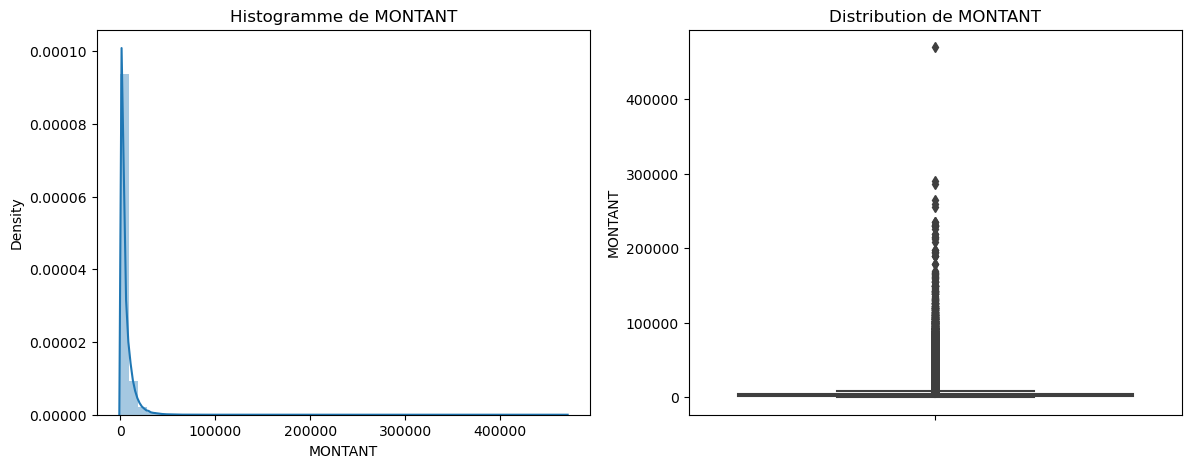

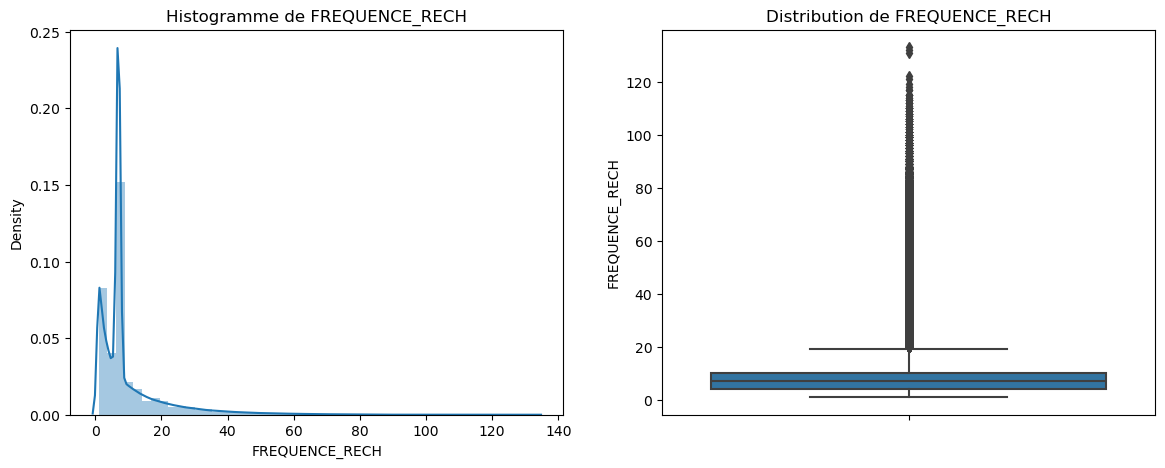

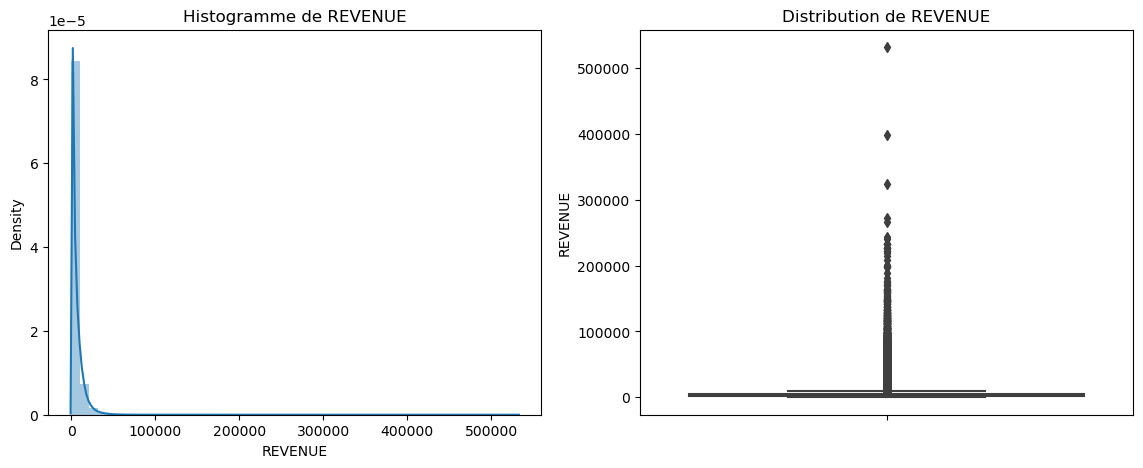

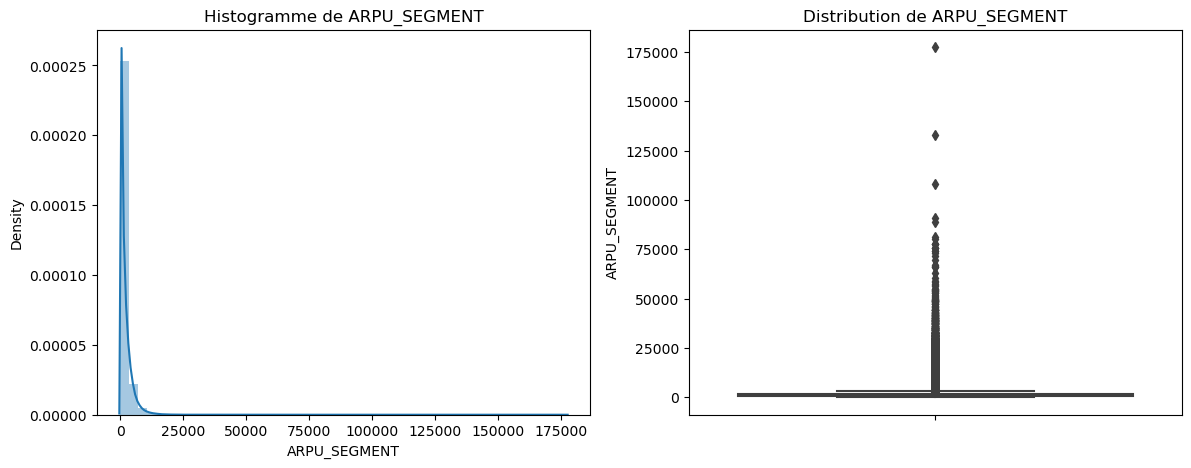

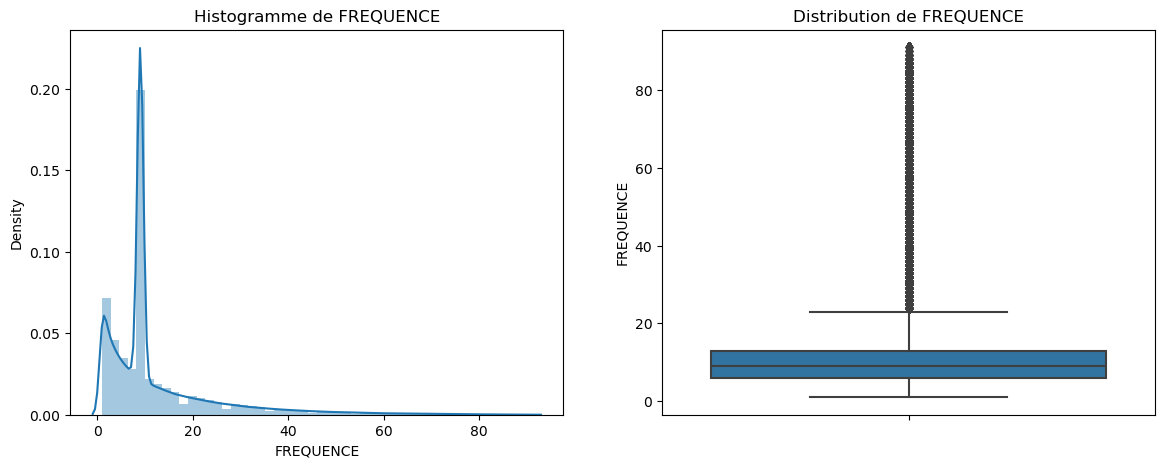

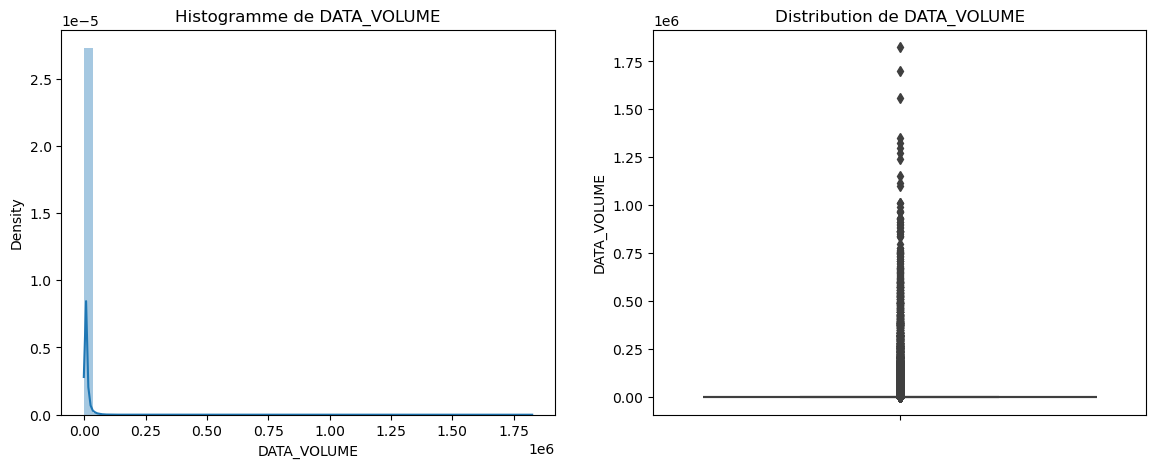

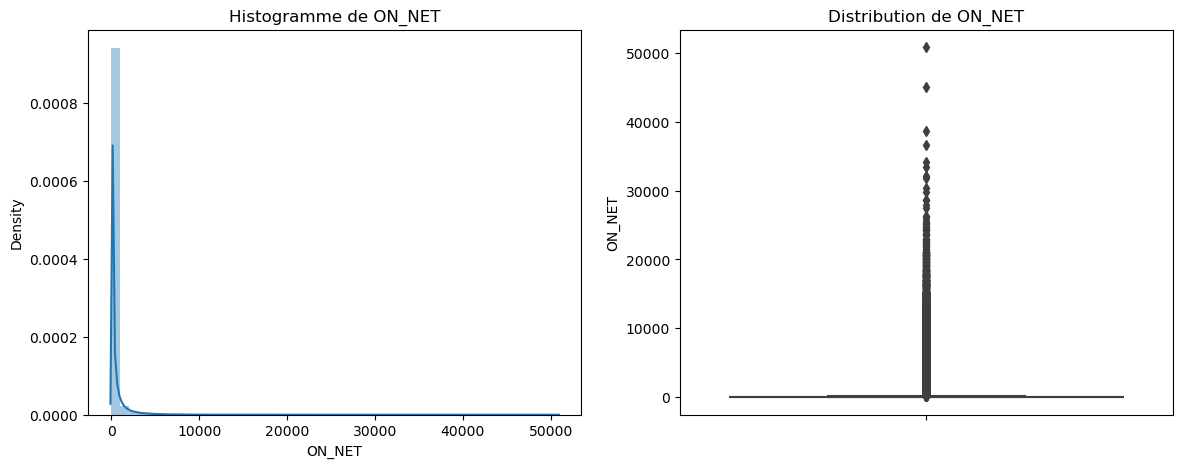

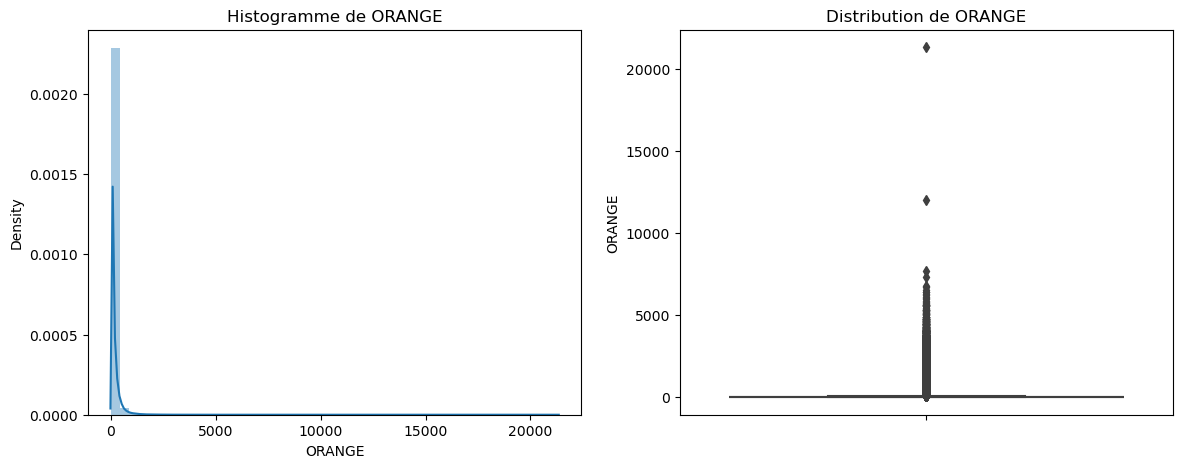

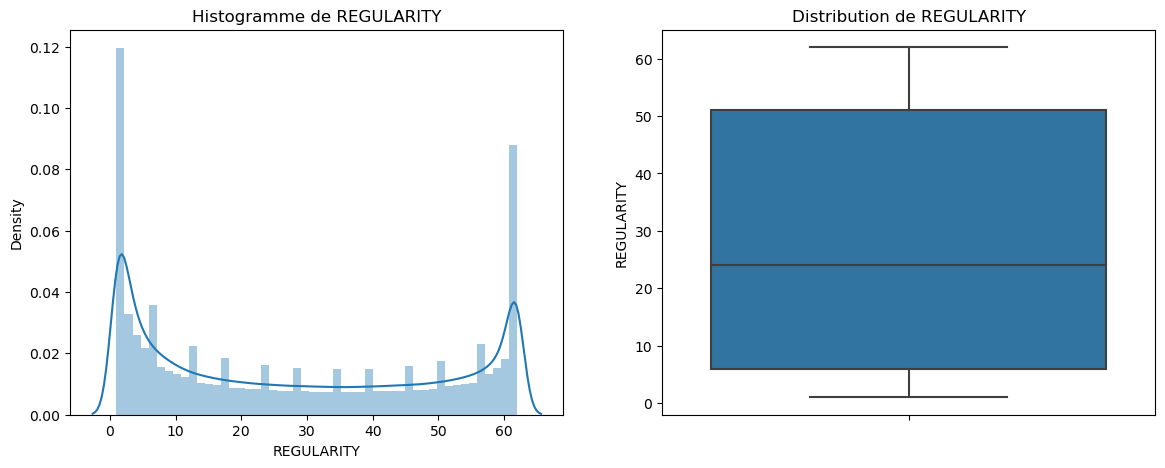

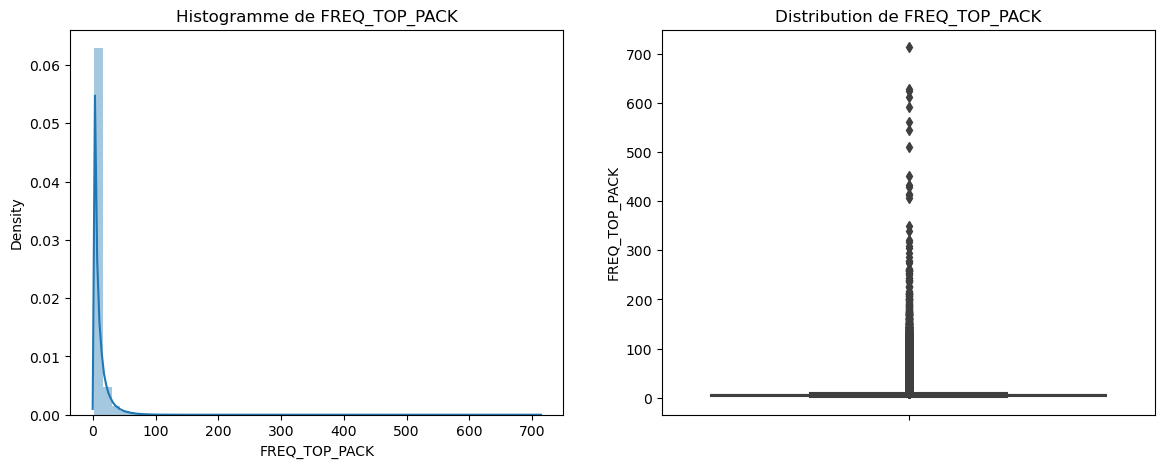

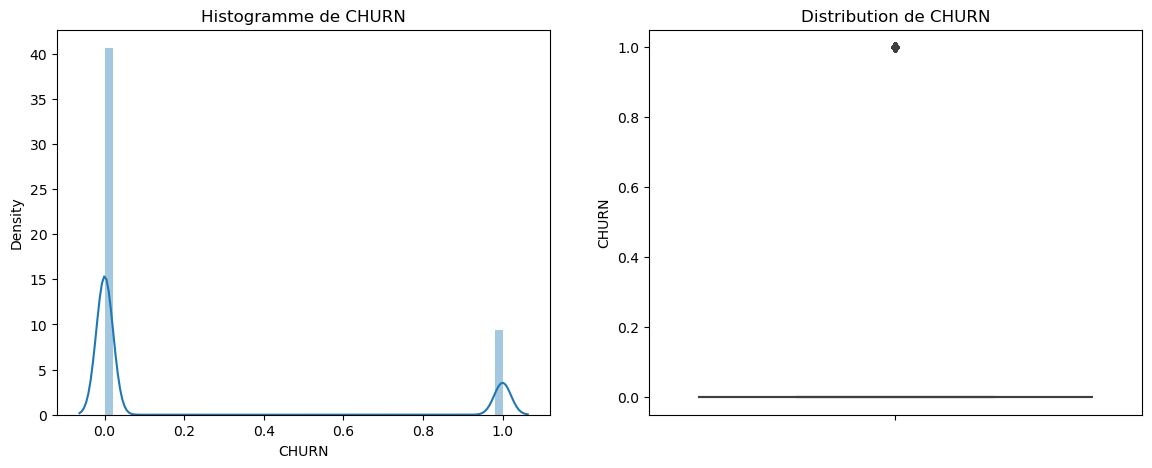

In [23]:
# fonction de visualisation des variables 
def hist_catplot_num(data,vars):
    
    for cols in vars:
        plt.figure(figsize=(14,5))
        plt.subplot(121)
    
        sns.distplot(data[cols]).set_title('Histogramme de '+str(cols))
        plt.subplot(122)
        sns.boxplot(y=cols, data=data).set_title("Distribution de "+str(cols))
        plt.show()
hist_catplot_num(new_data,col_num)

#On décide de conserver les valeurs abérrantes


### B: DISTRIBUTION DES VARIABLES CATEGORIELLES

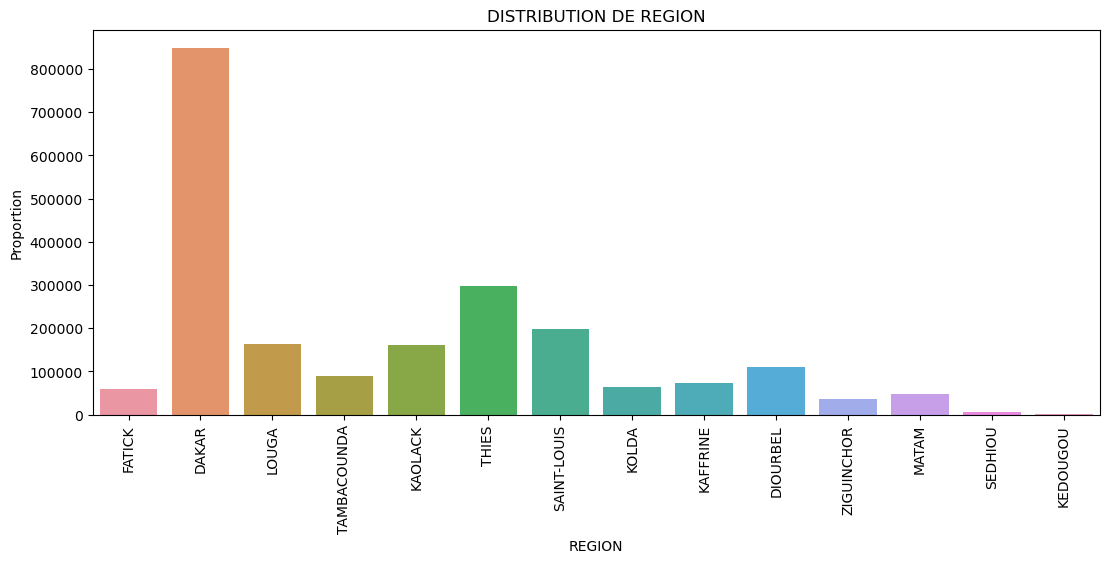

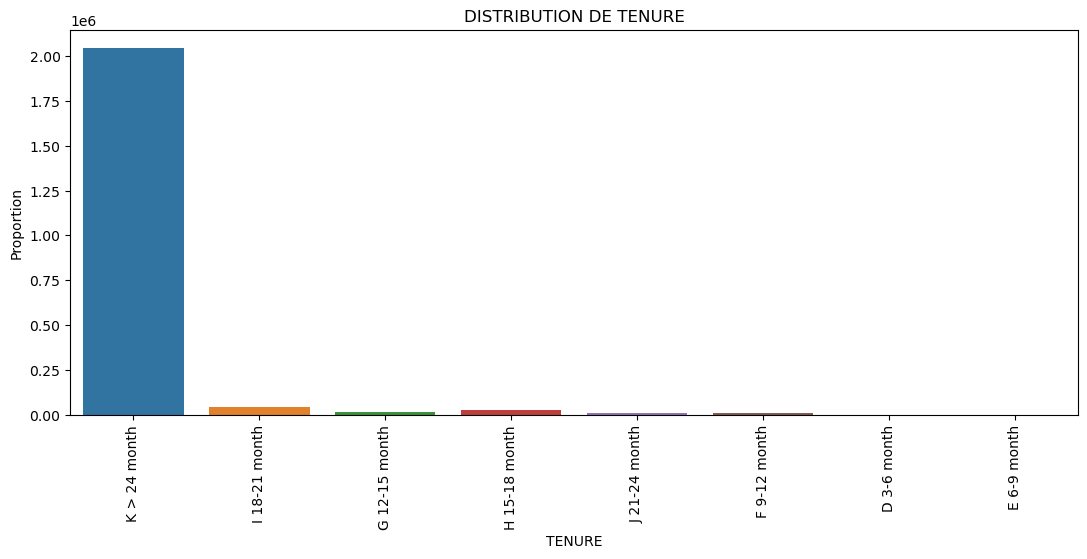

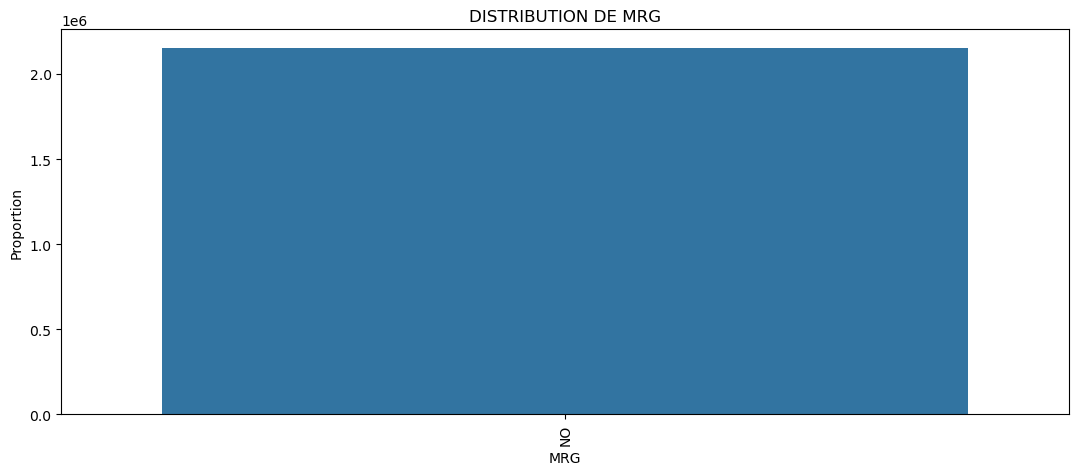

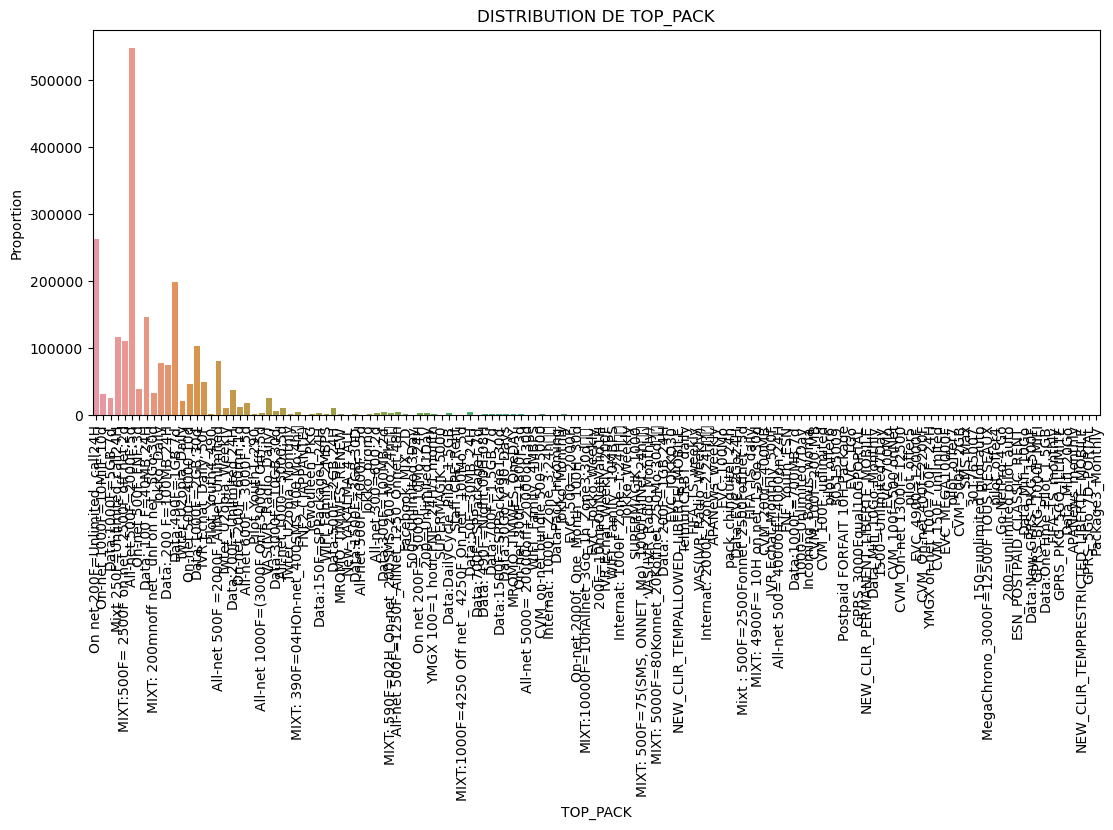

In [24]:
def countplot_categorial(data,vars):
    for col in vars:
        plt.figure(figsize=(13,5))
        sns.countplot(x=new_data[col])
        plt.title("DISTRIBUTION DE "+ str(col))
        plt.xlabel(str(col))
        plt.xticks(rotation=90)
        plt.ylabel("Proportion")
countplot_categorial(new_data,col_cat)

## 2-3: Analyse multivariée

### A: Relation entre la variable coble "CHURN" et les variables categorielles

<Figure size 1300x500 with 0 Axes>

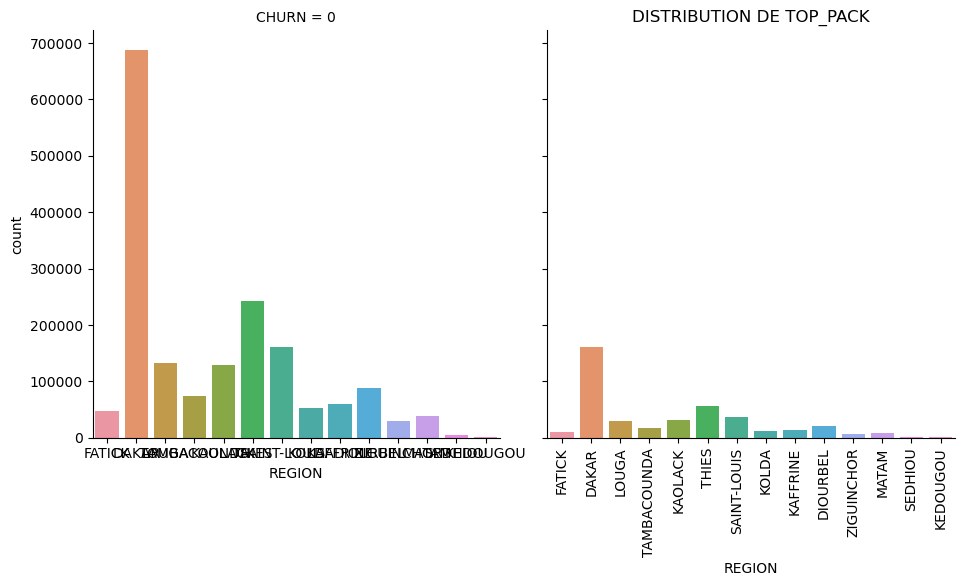

<Figure size 1300x500 with 0 Axes>

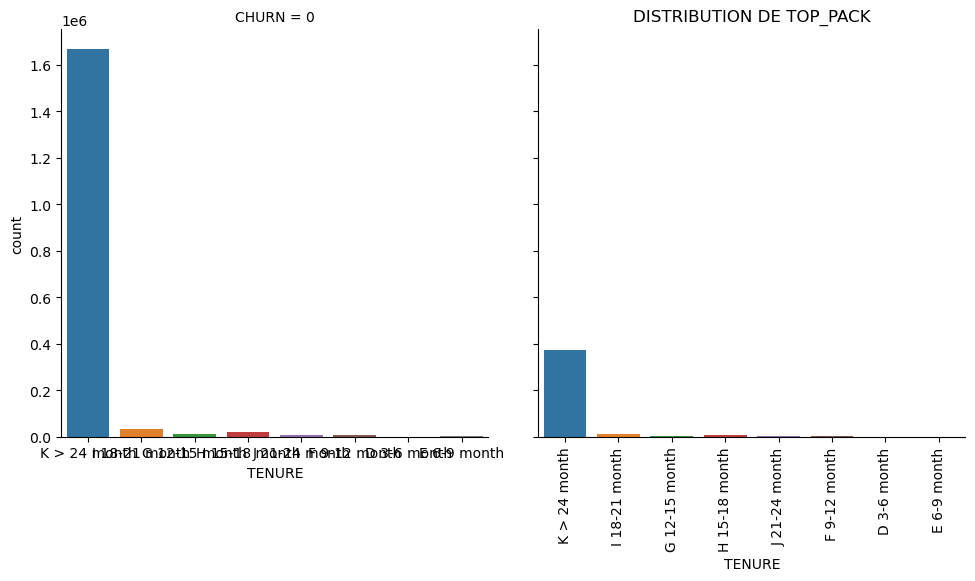

<Figure size 1300x500 with 0 Axes>

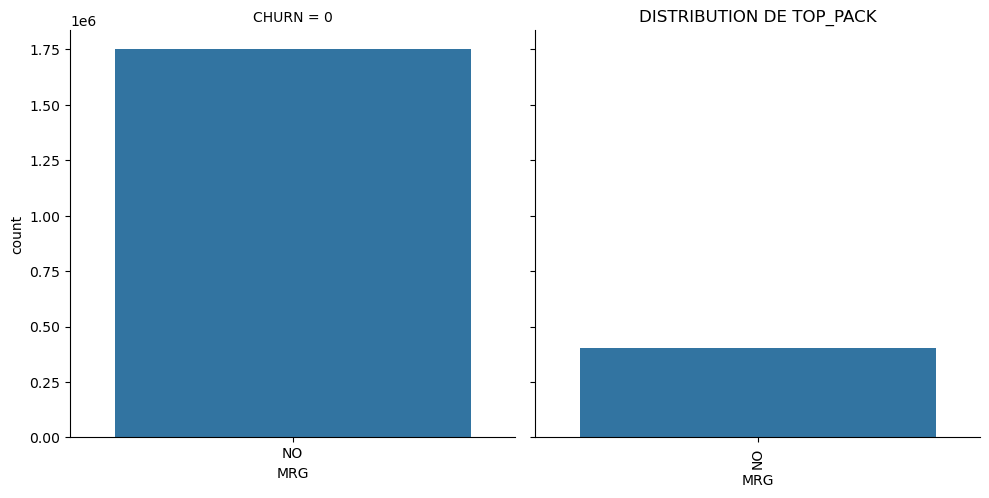

<Figure size 1300x500 with 0 Axes>

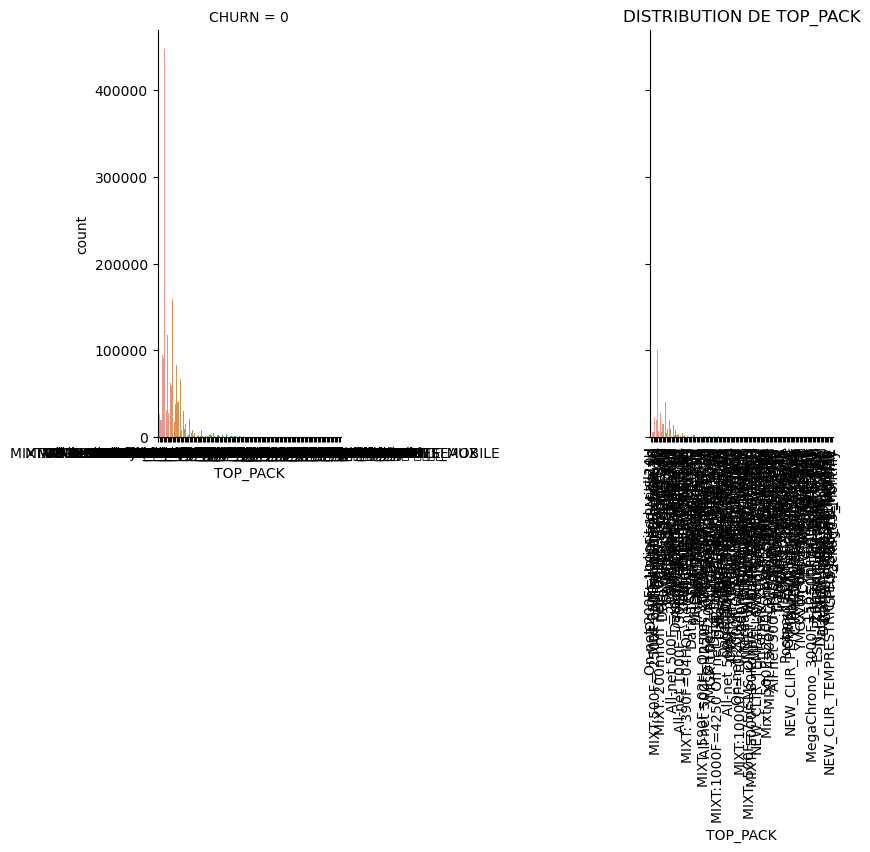

In [25]:
# relation entre le désabonnement "CHURN" et les variables categorielles
for var in col_cat:
    plt.figure(figsize=(13,5))
  
    sns.catplot(x=var ,col="CHURN", data=new_data, kind="count")
    plt.title("DISTRIBUTION DE "+ str(col))
    plt.xticks(rotation=90)
    plt.ylabel("Proportion")



### B: Relation entre la variable cible "CHURN" et les variables numériques

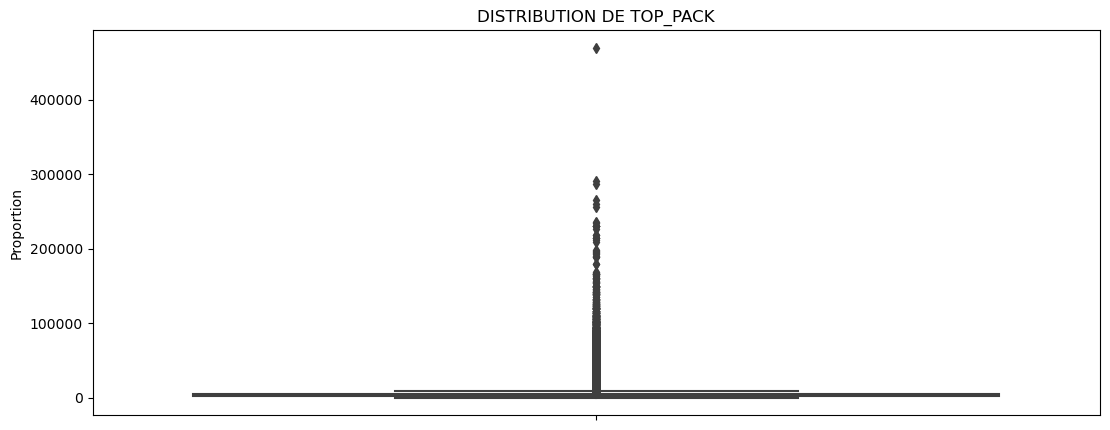

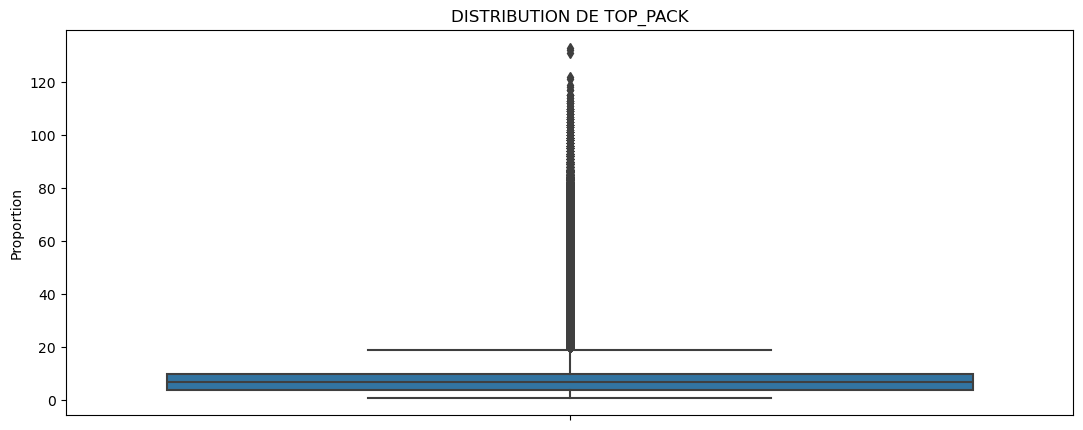

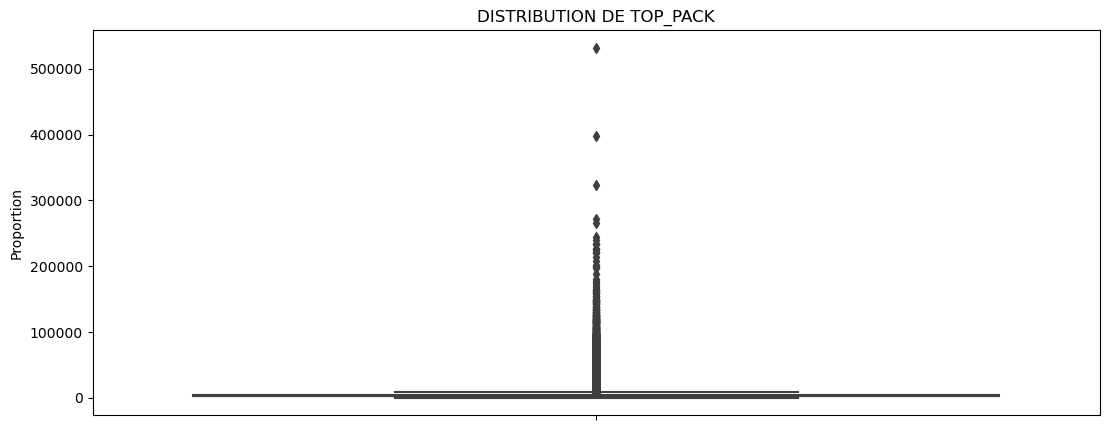

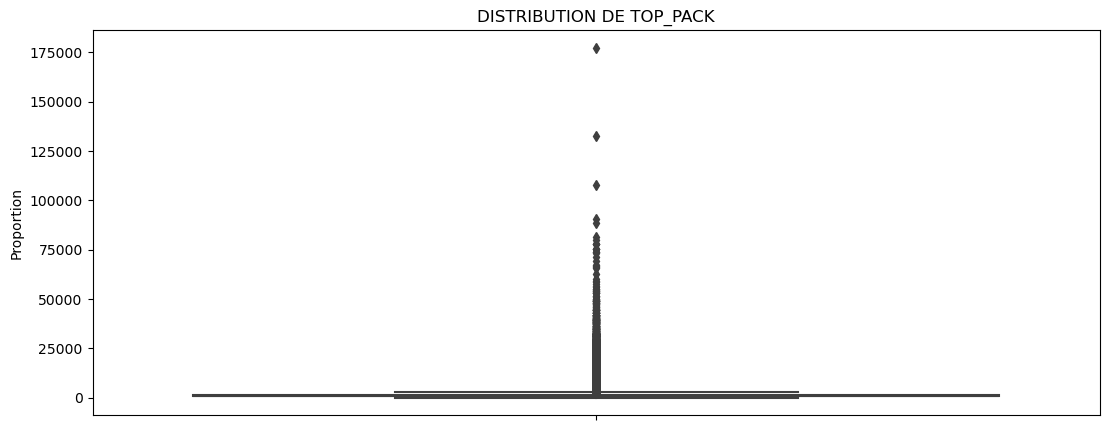

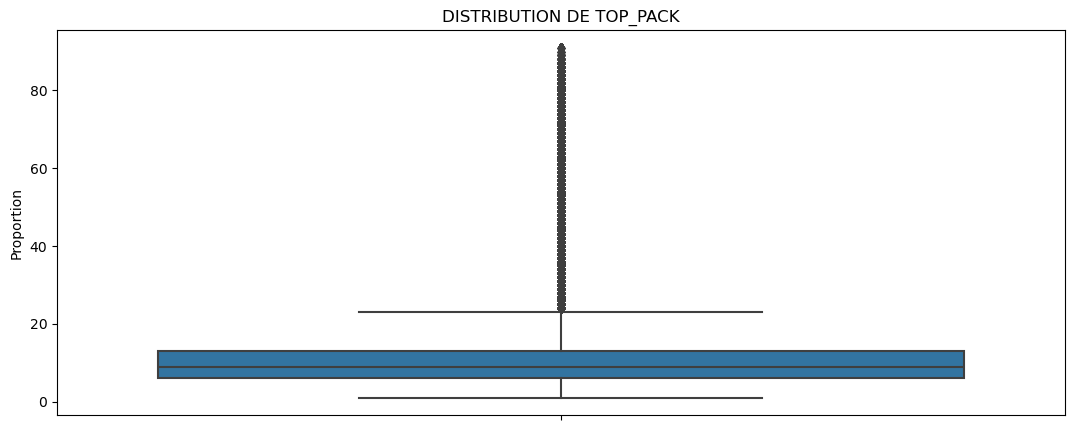

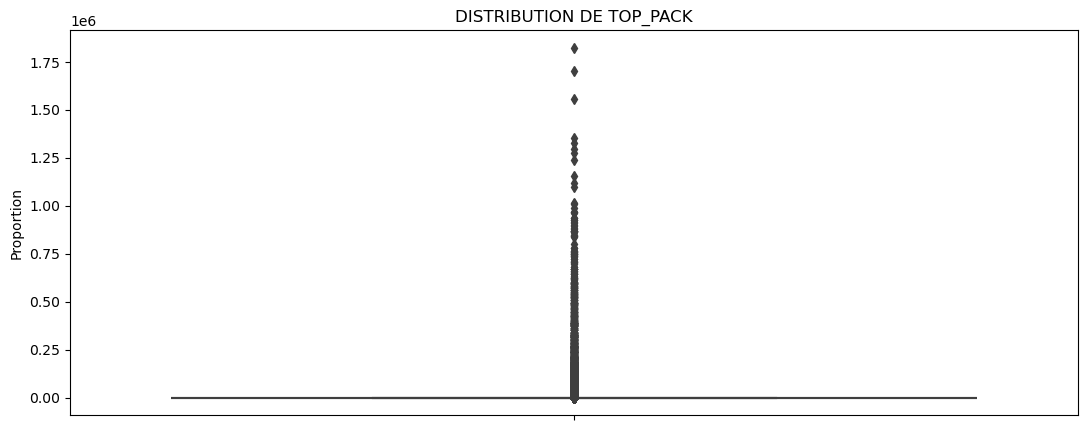

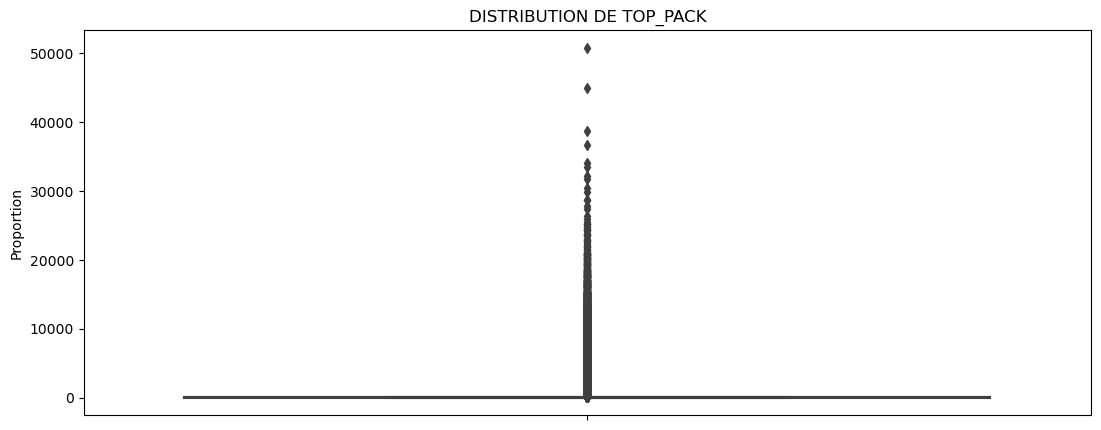

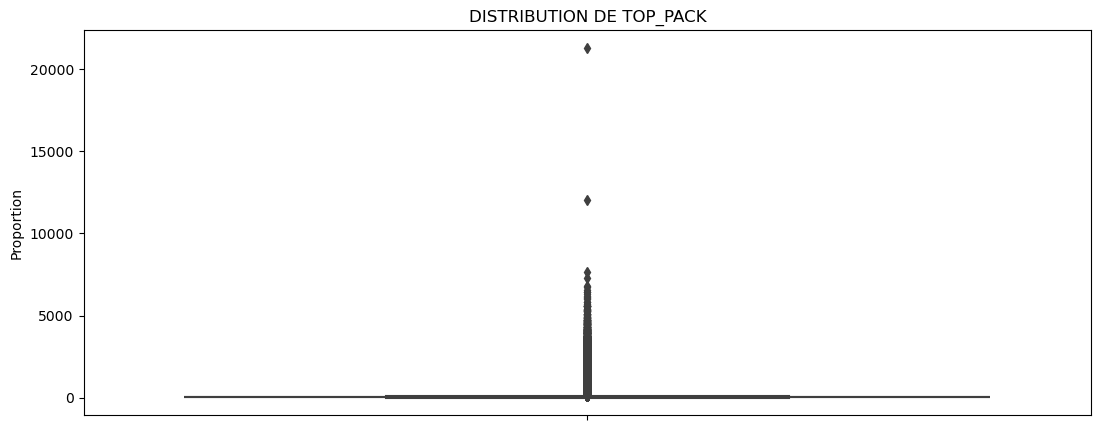

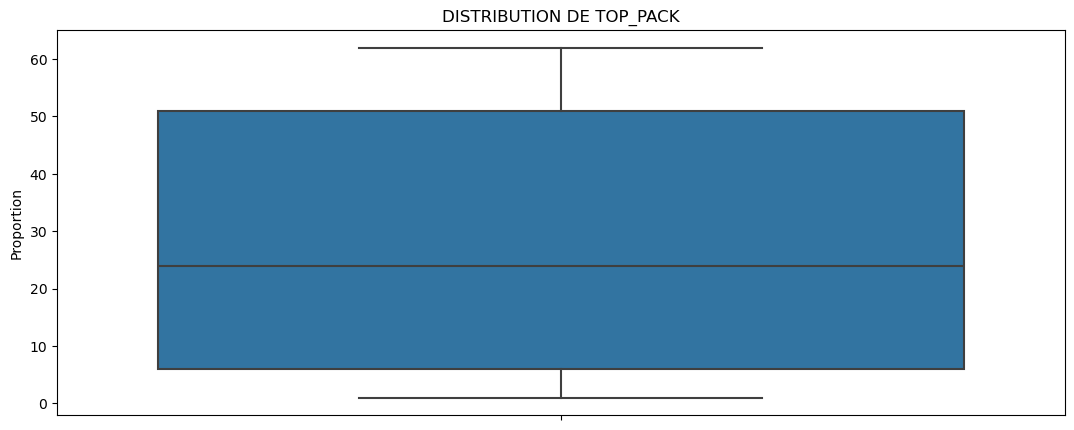

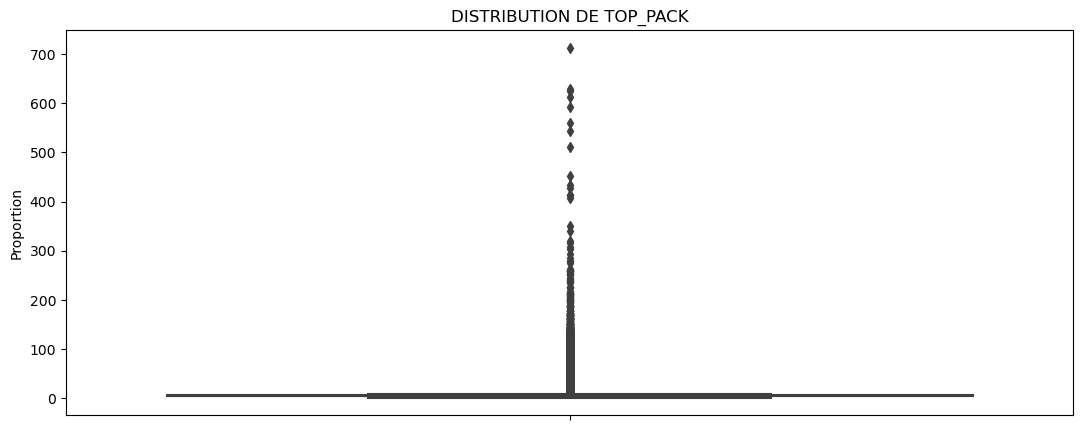

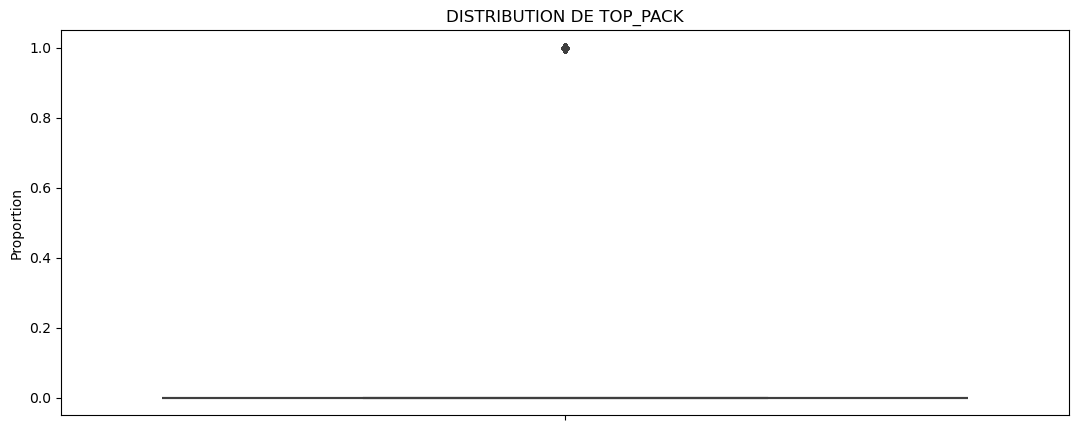

In [26]:
# relation entre le désabonnement "CHURN" et les variables numeriques
for var in col_num:
    plt.figure(figsize=(13,5))
    sns.boxplot(y=var , x="CHURN", data=new_data)
    plt.title("DISTRIBUTION DE "+ str(col))
    plt.xticks(rotation=90)
    plt.ylabel("Proportion")


# 3: Pré-traitement des données

## 3-1: Encodage des variables categorielles

In [27]:
#VERIFICATION DU NOMBRES DE VALEURS UNIQUE POUR CHAQUE VARIABLE CATEGORIELLE

new_data.select_dtypes(include='object').nunique()

user_id     2154048
REGION           14
TENURE            8
MRG               1
TOP_PACK        140
dtype: int64

Pour l'encodage des variables categorielles, nous consatons que la variables **MRG** est une constante, donc nous allons l'ignorer donc unitule de l'encoder,et quant aux autres variables,elles poccedent trop de modalitées differentes, donc pour leurs encodage nous procederons :

- Premierement à une encodage à chaud et  à un groupage 
- Deuxièment à une encodage binnaire

In [28]:
# creation d'une copy du dataframe
data_cp = new_data.copy()

#### Encodage à chaud

In [29]:
#ENCODAGE A CHAUD: exclusion des variables unitiles: user_id et MRG

col_cat = data_cp.drop(['user_id','MRG'],axis=1).select_dtypes(include='object').columns.tolist()
lab = LabelEncoder()

#------application de label encodeur pour chaque variables categorielles ayant plus de 2 valeurs uniques
for col in col_cat :
    data_cp[col] = lab.fit_transform(data_cp[col])


##### Groupage des variables : (Region,Tenure et Top_Pack)

In [30]:
#GROUPAGE DES VARIABLES AYANT BEAUCOUP PLUS DE MODALITES

data_cp['REGION7'] = pd.cut(data_cp['REGION'],bins=2,labels=[0,1]) # grouper les regions en 2 groupes de 7 Regions

data_cp['TENURE4'] = pd.cut(data_cp['TENURE'],bins=2,labels=[0,1]) # grouper les Tenures en 2 groupes de 4 Tenures

data_cp['TOP_PACK50'] = pd.cut(data_cp['TOP_PACK'],bins=3,labels=[0,1,2]) # grouper les Top_pack en 3 groupes 

In [31]:
# verification apres l'encodage
data_cp.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REGION7,TENURE4,TOP_PACK50
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,2,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,NO,54,107,8.0,0,0,1,2
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,2,5,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,NO,4,107,5.0,1,0,1,2
2,00001654a9d9f96303d9969d0a4a851714a4bb57,2,7,3600.0,2.0,1020.0,340.0,2.0,257.0,90.0,46.0,NO,17,108,1.0,0,0,1,2
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,0,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,NO,62,35,11.0,0,0,1,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,0,7,1000.0,1.0,985.0,328.0,1.0,257.0,39.0,24.0,NO,11,100,2.0,0,0,1,2


## 3-2: DIVISION DES DONNEES (EN TEST et EN TRAIN)

In [32]:
# x = data_cp.drop(['user_id','MRG','CHURN','REGION','TENURE','TOP_PACK','REGION7','TENURE4','TOP_PACK50'],axis=1)
x = data_cp.drop(['user_id','MRG','CHURN','REGION','TENURE','TOP_PACK'],axis=1)
y = data_cp['CHURN']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

## A: Gestion du désequilibre des classes
En machine laerning, la performance d'un modele depend de la qualité des données utilisée. Et d'Apres l'analyse visuelle nous avons constaté qu'il y a une deséquilibre au sein de notre variables cible **CHURN**. Ces deux  classes sont **1 = "Desaboné"** et **O = "Non desabonné"** , lorsqu'il ya une deséquilibre de classe entre ces deux classes c-a-d il ya plus de clients abonnés et que desabonnés ou vis-vers ça,cela va impacter la performance du modele car il va  privilegiés la classe majoritaire.

Pour résoudre cet probleme, nous utilisé deux solutions:
- Le sur-échantillonage: augmenter la classe classe minoritaire
- Le sous-échantillonage: diminuer la classe classe minoritaire

### 1: Verification du deséquilibre

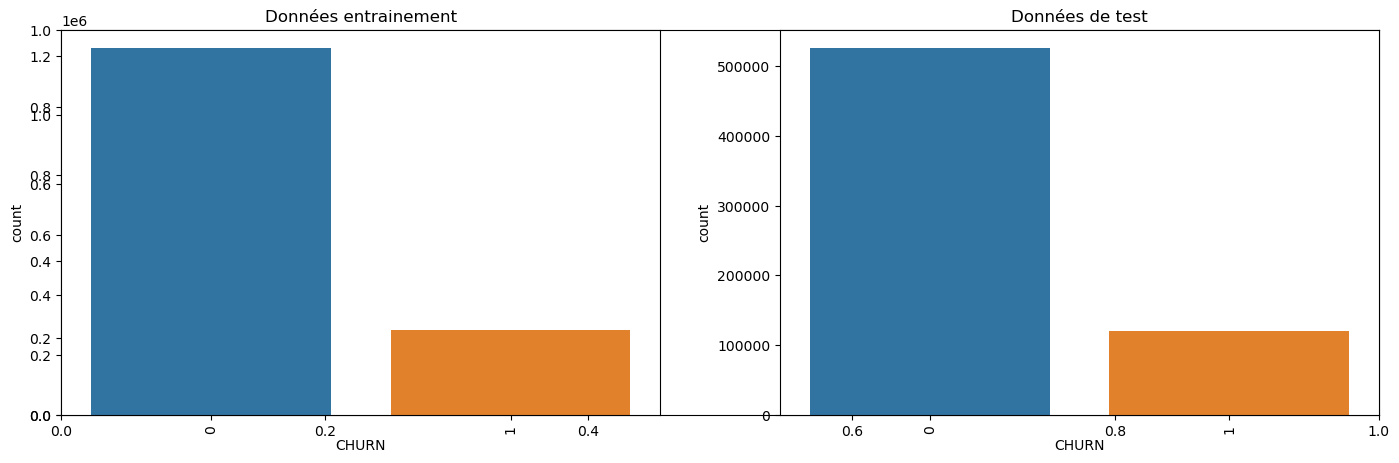

In [33]:
# verification du deséquilibre
plt.subplots(figsize=(17,5))
plt.subplot(121)
sns.countplot(x=y_train).set_title('Données entrainement')
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=y_test).set_title('Données de test')
plt.xticks(rotation=90)
plt.show()


#### 2: Correction

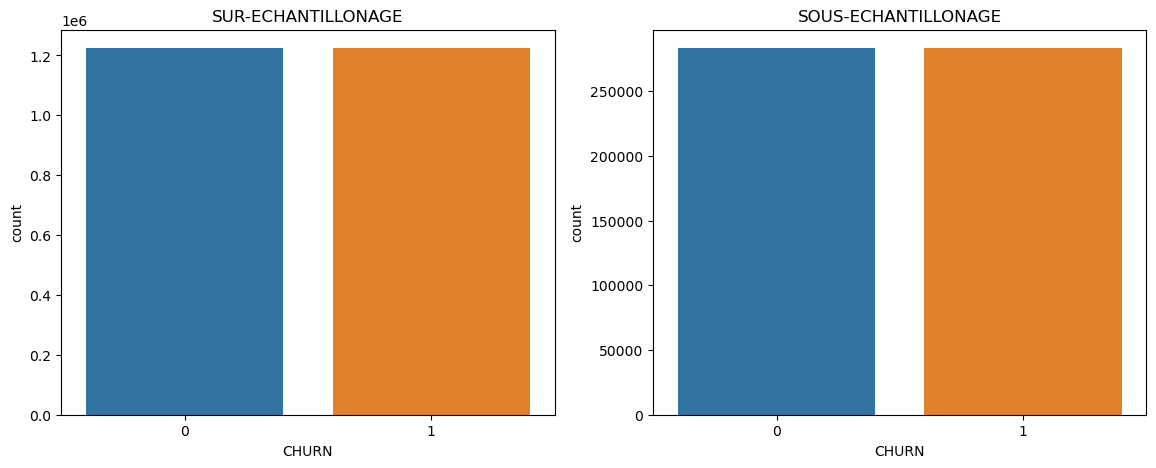

In [34]:
# correction du désequilibre des classes sur le données d'entrainement
x1=x_train
x1['CHURN']=y_train.values
minority = x1[x1['CHURN']==1]
majority = x1[x1['CHURN']==0]

#---------sous-echantillonage------------------
majoriy_dowsample = resample(majority, n_samples=len(minority),random_state=95)
dowsampled = pd.concat([minority,majoriy_dowsample])
x_train_dow=dowsampled.drop('CHURN',axis=1)
y_train_dow=dowsampled['CHURN']

# correction du désequilibre des classes
#---------sur echantillonage------------------
minority_upsample = resample(minority, n_samples=len(majority),random_state=95)
upsampled = pd.concat([majority,minority_upsample])
x_train_up=upsampled.drop('CHURN',axis=1)
y_train_up=upsampled['CHURN']

# verification apres correction
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.countplot(x=y_train_up).set_title('SUR-ECHANTILLONAGE')

plt.subplot(122)
sns.countplot(x=y_train_dow).set_title('SOUS-ECHANTILLONAGE')
plt.show()




## B: Choix des données d'entrainement
Nous avons 3 choix possaible pour entrainer nos algorithmes
- Les données originales non équilibrées
- Les données issues du sur-echantillonage
- Les donnnées issues du sous-echantillonage

In [35]:
# choix des données d'entrainement: (x_train,y_train),(x_train_up,y_train_up) et (x_train_down,y_train_down)
'''
Nous pouvons utiliser diferentes données et voir les données qui nous donnent plus de performances et les concerber, 
dans notre cas nous choissions les données isuues du sur-echantillonage (x_train_up,y_train_up)
'''
features_train= x_train_up
labels_train  =y_train_up


# 4 : Modélisation

### A. ALGORITHME DE FORET ALEATOIRE

In [36]:
# entrainement du model
rf = RandomForestClassifier(random_state=95)

model_rf = rf.fit(x_train_up,y_train_up)



In [37]:
### Commme nous allons utiliser plusieurs algorithmes, alors nous allons créer une fonction d'evaluation de modele
def evaluation_model(model):
    # prediction
    ytrain_pred = model.predict(x_train_up)

    ytest_pred = model.predict(x_test)

    #EVALUATION DE PERFORMANCE

    print("Performance sur les données d'entrainement\n")

    print("Accuracy : ",accuracy_score(y_train_up,ytrain_pred))
    print("Recall : ",recall_score(y_train_up,ytrain_pred))
    print("Precision : ",precision_score(y_train_up,ytrain_pred))

    print("*"*50)

    print("Performance sur les données de test\n")
    
    print("Accuracy : ",accuracy_score(y_test,ytest_pred))
    print("Recall : ",recall_score(y_test,ytest_pred))
    print("Precision : ",precision_score(y_test,ytest_pred))

    # matrice de confusion
    cm=confusion_matrix(y_test,ytest_pred)
    cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_disp.plot()
    plt.show()

Performance sur les données d'entrainement

Accuracy :  0.9125533659326911
Recall :  0.978738555110227
Precision :  0.8643272323424632
**************************************************
Performance sur les données de test

Accuracy :  0.8234194501829887
Recall :  0.7931857153507791
Precision :  0.5178696983136284


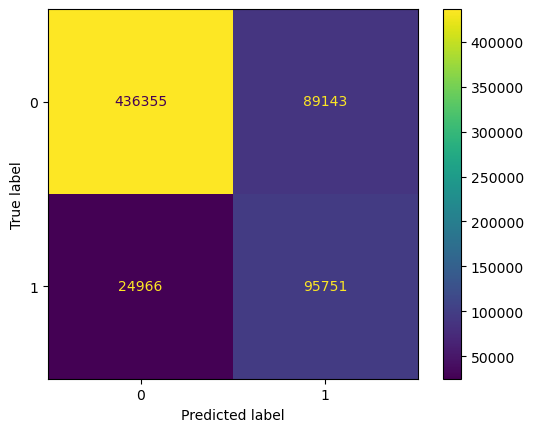

In [38]:
# evaluation du modele random forest
evaluation_model(model_rf)

### B: Algorithme de Regression logistique

In [39]:
# modelisation avec regression logistique
lr =LogisticRegression ()

model_lr = lr.fit(x_train_up,y_train_up)


Performance sur les données d'entrainement

Accuracy :  0.8101213983099291
Recall :  0.8129660842552942
Precision :  0.8083669838599272
**************************************************
Performance sur les données de test

Accuracy :  0.8075949954736427
Recall :  0.8118409171864774
Precision :  0.49093796337113776


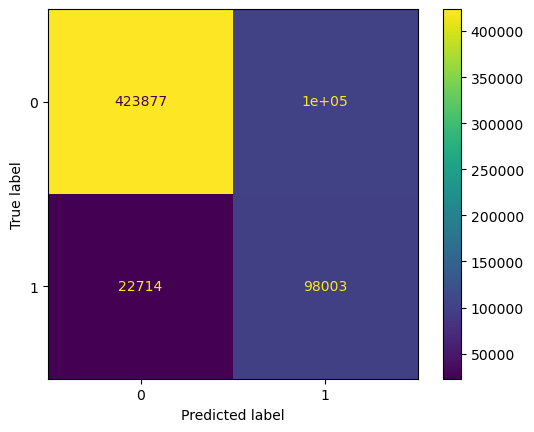

In [40]:
# evaluation du modele logistique regression
evaluation_model(model_lr)

**Après l'évaluation des différents modèles ,nous avons selectionné le modele de Randomforest car il nous donne des meilleurs performance.
Il semble être mieux adapté pour résoudre notre problème.**

## C: OPtimisation du modele choisi:
Il ya plusieurs methode d'optimisation d'un modele, dans notre cas nous allons juste reduire le nombre de variables , donc nous allons choisir les variables ayant plus d'importance

Text(0.5, 0, 'Importance')

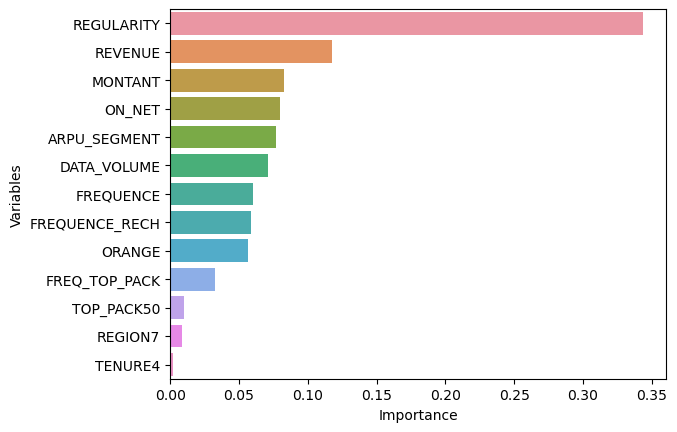

In [41]:
# optimisation du modele Random forest
# selection des variables les plus importantes
imp_vars= pd.Series(model_rf.feature_importances_, index=features_train.columns).sort_values(ascending=False)

sns.barplot(x=imp_vars.values,y=imp_vars.index)
plt.ylabel('Variables')
plt.xlabel('Importance')



In [42]:
# affichage des niveaux d'importance
print(imp_vars)


REGULARITY        0.343162
REVENUE           0.117368
MONTANT           0.082692
ON_NET            0.080059
ARPU_SEGMENT      0.076660
DATA_VOLUME       0.071393
FREQUENCE         0.060094
FREQUENCE_RECH    0.058435
ORANGE            0.056617
FREQ_TOP_PACK     0.032631
TOP_PACK50        0.010350
REGION7           0.008765
TENURE4           0.001776
dtype: float64


In [43]:
# variables selectionner avec un seul de 
seuil=0.05
var_selected  =imp_vars[imp_vars>seuil].index.tolist()
var_selected


['REGULARITY',
 'REVENUE',
 'MONTANT',
 'ON_NET',
 'ARPU_SEGMENT',
 'DATA_VOLUME',
 'FREQUENCE',
 'FREQUENCE_RECH',
 'ORANGE']

In [44]:
# selection des variables dans les features
x_train_up=x_train_up[var_selected]
x_test=x_test[var_selected]
#x_val=x_val[var_selected]



Performance sur les données d'entrainement

Accuracy :  0.906641874169092
Recall :  0.9748735059988698
Precision :  0.8578134790381642
**************************************************
Performance sur les données de test

Accuracy :  0.8200134630115364
Recall :  0.805876554254993
Precision :  0.5115876713697485


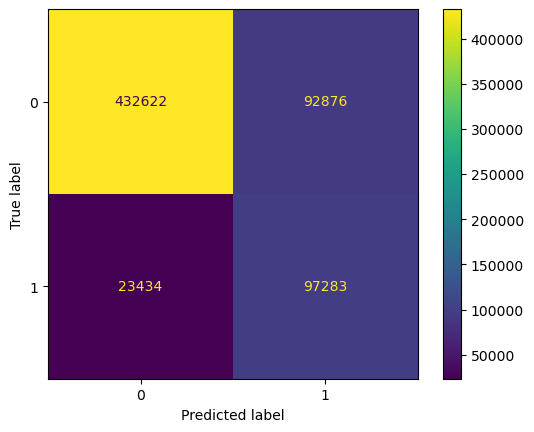

In [45]:
## RandomForestClassifier
rf = RandomForestClassifier(random_state=95)
model_rf = rf.fit(x_train_up,y_train_up)
evaluation_model(model_rf)

## D: Enregistrement du modele final

In [ ]:
import joblib
joblib.dump(model_rf,"model_expresso.joblib")

# 5 : Conclusion :
L'objetif de cette analyse est de construire un modele de machine learning pour arlerter le risque de désabonnement des clients de la sociéte EXPRESSO. 

A cet effet, nous sommes parvenu à créer un modele capable de prédire la probabilité qu'un client se désabonne ou pas avec **Une certitude de 85%** et **Une erreure de 15%**